Importamos los modulos necesarios, pandas para trabajar  y numpy para trabajar nuestros datos, train test para elegir datos de entrenamiento y prueba, logisticRegression para realizar el modelo ya que es binario elejimos este modelo, y las metricas para revisar nuestra prediccion 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

Cagamos nuestros datos con pandas dataframe

In [907]:
df=pd.read_csv('E-Commerce_train.csv',sep=';',index_col=False)

In [3]:
df=pd.read_json('Home_and_Kitchen_5.json',lines = True )


In [14]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"
...,...,...,...,...,...,...,...,...,...
551677,A11J1FHCK5U06J,B00LBFUU12,Karinna Ball,"[0, 0]",These ice pop molds are awesome! Bright kid-ha...,5,Summer fun for everyone!,1404950400,"07 10, 2014"
551678,A537XC69FAD3J,B00LBFUU12,L Green,"[0, 0]",great popsicle molds - very nice quality - and...,5,Five Stars,1405382400,"07 15, 2014"
551679,AWHZOUIQ0VO7M,B00LBFUU12,Richard N,"[0, 0]",My kids and I are loving these - putting our c...,5,... these - putting our creativity to the test...,1405468800,"07 16, 2014"
551680,A1KQNP8MOJDJKC,B00LBFUU12,RS,"[1, 1]","I love these ice pop makers. First off, I love...",5,love them,1405209600,"07 13, 2014"


In [3]:
df=pd.read_json('Electronics_5.json', lines = True )

In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [10]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      4953
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [11]:
nan_rows = df[df.isnull().any(1)]

In [12]:
nan_rows

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
589,A3SK9OTLNCFPJB,B00002N5Z9,NaN,"[0, 0]",One Of The Best Fans I Have Ever Bought & I Lo...,5,Best Fan,1405382400,"07 15, 2014"
640,APFSFA4B91BOI,B00002N5ZB,NaN,"[0, 0]",This replaced a fan I broke in a drunken episo...,5,The best one yet.,1405382400,"07 15, 2014"
1013,A28Q0JA9H8WZOD,B00002N8CX,NaN,"[0, 0]",I have had an older model Eureka mighty mite c...,4,Hose Easily Kinks,1405123200,"07 12, 2014"
1014,A38BLIS5VGGL84,B00002N8CX,NaN,"[0, 0]",This was a gift for my mom. She says it works ...,5,She says it works great is lightweight and eas...,1405123200,"07 12, 2014"
1015,AL9QL5PKAMXKZ,B00002N8CX,NaN,"[0, 0]",We have only tile and wood floors so this is t...,5,I don't know what I would do without this,1405296000,"07 14, 2014"
...,...,...,...,...,...,...,...,...,...
550443,A149FSL9QLEN74,B00K7ILPYU,NaN,"[0, 0]",I wasn't quite sure about this since I've not ...,5,Easy to use mold,1403827200,"06 27, 2014"
550444,A3MNHS1HHTAP7O,B00K7ILPYU,NaN,"[0, 0]",The Stylophora Ice Ball Molds are very easy to...,5,"great product, perfect for kids",1403827200,"06 27, 2014"
550445,AQWDQAWQYDB2S,B00K7ILPYU,NaN,"[0, 0]",This is a package of three ice molds with a fu...,5,Cool!,1404000000,"06 29, 2014"
550692,A2BYV7S1QP2YIG,B00KBQ1OHQ,NaN,"[0, 0]","Once you use silicone to bake, I don't think y...",5,Works great..,1402012800,"06 6, 2014"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [12]:
dfmeta=pd.read_json('metadata.json', lines = True )

MemoryError: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk



In [2]:
df=pd.read_json('Home_and_Kitchen_5.json',lines = True )

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"


<AxesSubplot:title={'center':'Conteo de calificacion'}>

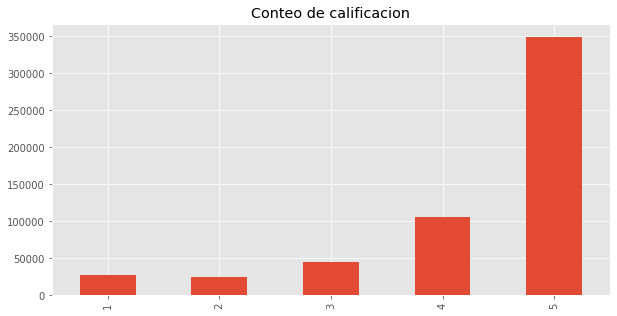

In [4]:
df["overall"].value_counts().sort_index().plot(kind="bar", title="Conteo de calificacion", figsize=(10,5))

In [5]:
ejemplo=df["reviewText"][30]

In [6]:
ejemplo

'This lesson plan is perfect for a beginner and definitely helped introduce working with fondant in a user-friendly way.  Thanks, Wilton.'

In [7]:
nltk.word_tokenize(ejemplo)

['This',
 'lesson',
 'plan',
 'is',
 'perfect',
 'for',
 'a',
 'beginner',
 'and',
 'definitely',
 'helped',
 'introduce',
 'working',
 'with',
 'fondant',
 'in',
 'a',
 'user-friendly',
 'way',
 '.',
 'Thanks',
 ',',
 'Wilton',
 '.']

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [9]:
sia=SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores("ei am so happy")

{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.6948}

In [11]:
sia.polarity_scores(ejemplo)

{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.8519}

In [12]:
ejemplo

'This lesson plan is perfect for a beginner and definitely helped introduce working with fondant in a user-friendly way.  Thanks, Wilton.'

In [14]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row["reviewText"]
    myid=row["reviewerID"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/551682 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [21]:
MODEL=F"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer= AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
